In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import random

In [14]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [15]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train / 255
X_test = X_test / 255

In [16]:
print("Shape of X_train", X_train.shape)
print("Shape of Y_train", Y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_test", Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


[[[0.51372549 0.50196078 0.52941176]
  [0.62745098 0.61568627 0.64313725]
  [0.77647059 0.75294118 0.8       ]
  ...
  [0.98039216 0.97647059 0.96862745]
  [1.         1.         0.99215686]
  [0.98039216 0.97647059 0.96078431]]

 [[0.54901961 0.5372549  0.56470588]
  [0.49803922 0.48627451 0.51372549]
  [0.47058824 0.44705882 0.48627451]
  ...
  [0.98431373 0.99215686 0.98823529]
  [0.99607843 1.         0.99215686]
  [0.99607843 1.         0.98431373]]

 [[0.8        0.79215686 0.81176471]
  [0.73333333 0.7254902  0.74509804]
  [0.57647059 0.55686275 0.58039216]
  ...
  [0.97647059 1.         1.        ]
  [0.93333333 0.96862745 0.94901961]
  [0.90980392 0.94509804 0.9254902 ]]

 ...

 [[0.68235294 0.71372549 0.76470588]
  [0.6745098  0.70588235 0.75686275]
  [0.69803922 0.72941176 0.77254902]
  ...
  [0.34117647 0.44705882 0.38039216]
  [0.29411765 0.38823529 0.3254902 ]
  [0.31372549 0.41176471 0.3372549 ]]

 [[0.65098039 0.67843137 0.74117647]
  [0.64313725 0.6745098  0.7254902 ]


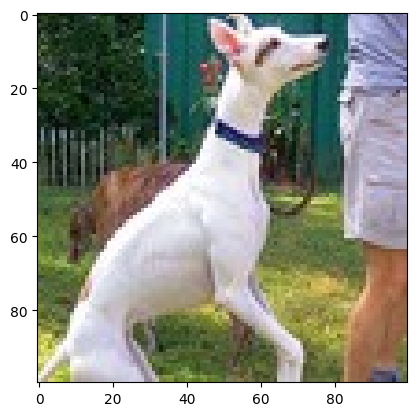

In [51]:
print(X_train[1,:])
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [33]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [34]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 4s 115ms/step - loss: 0.1777 - accuracy: 0.9445
Epoch 2/5
32/32 [==============================] - 4s 114ms/step - loss: 0.1343 - accuracy: 0.9565
Epoch 3/5
32/32 [==============================] - 4s 115ms/step - loss: 0.0859 - accuracy: 0.9785
Epoch 4/5
32/32 [==============================] - 4s 115ms/step - loss: 0.0745 - accuracy: 0.9820
Epoch 5/5
32/32 [==============================] - 4s 115ms/step - loss: 0.0477 - accuracy: 0.9945


In [38]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 16ms/step - loss: 1.0990 - accuracy: 0.6825


[1.0990365743637085, 0.6825000047683716]

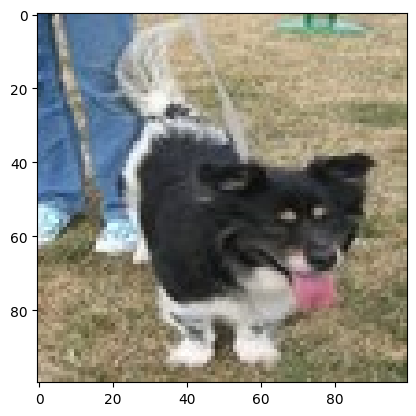

1/1 [==============================] - 0s 17ms/step
DOG


In [50]:
idx2 = random.randint(0,len(X_test))
plt.imshow(X_test[idx2,:])
plt.show()
y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3)) > 0.5
if y_pred == False:
    print("DOG")
else:
    print("CAT")